# In this script we will explore Heart Attack data from Kaggle to predict using various machine learning model whether the person is susceptible to heart attach

#### Importing necessary library for data exploration

In [3]:
import pandas as pd
from pandas_profiling import ProfileReport
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
df = pd.read_csv('heart.csv')
df1 = pd.read_csv('o2Saturation.csv')

In [4]:
df.head()

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trtbps    303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalachh  303 non-null    int64  
 8   exng      303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slp       303 non-null    int64  
 11  caa       303 non-null    int64  
 12  thall     303 non-null    int64  
 13  output    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


# EDA

#### Using pandas profiler to see various statistical value of the data

In [6]:
profile = ProfileReport(df, title='Pandas Profiling Report')

In [55]:
profile.to_widgets()
profile.to_file('report.html')

Export report to file:   0%|          | 0/1 [00:00<?, ?it/s]

### According to the report from pandas profiler we know that:
1. There are several outlier from several features, so we need to adjust our approach later in ML section
2. There seems no correlation from the continous data, maybe we need more data to validate this statement
3. There is no missing value

### Visualizing the data

In [64]:
dis_value = df[['sex', 'cp', 'fbs', 'restecg', 'exng', 'slp', 'caa', 'output']]

In [65]:
con_value = df[['age', 'trtbps', 'chol', 'thalachh', 'oldpeak', 'output']]

In [29]:
sns.set_style('whitegrid')

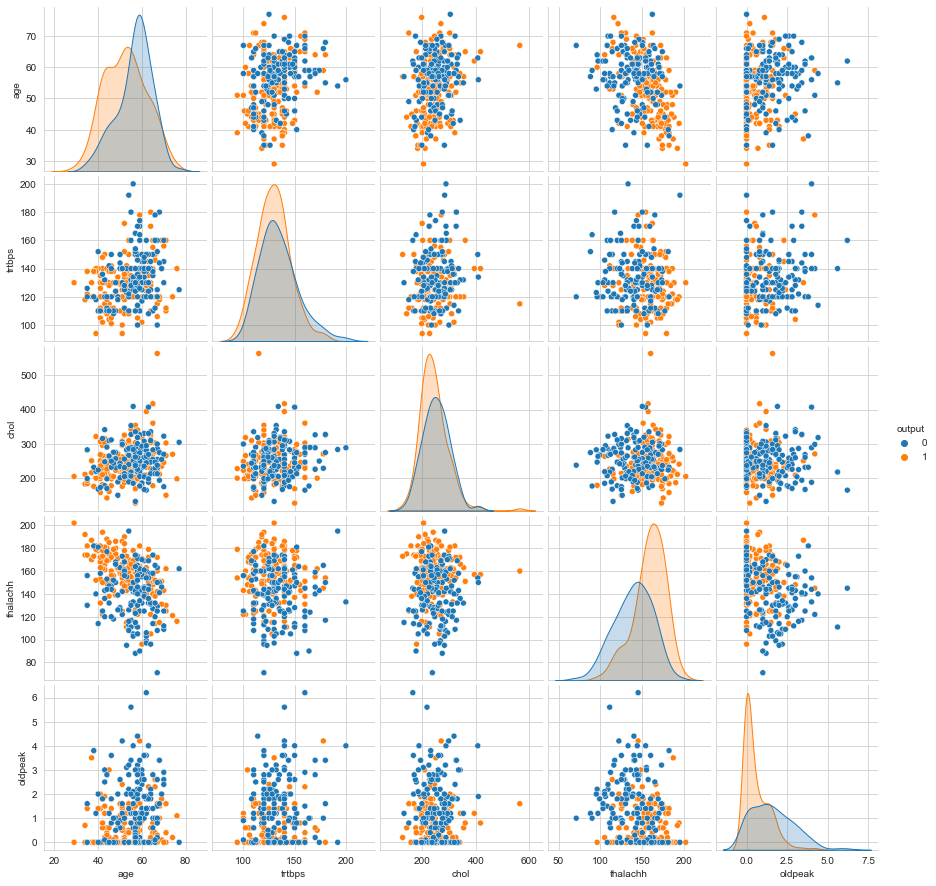

In [66]:
sns.pairplot(con_value, hue='output')

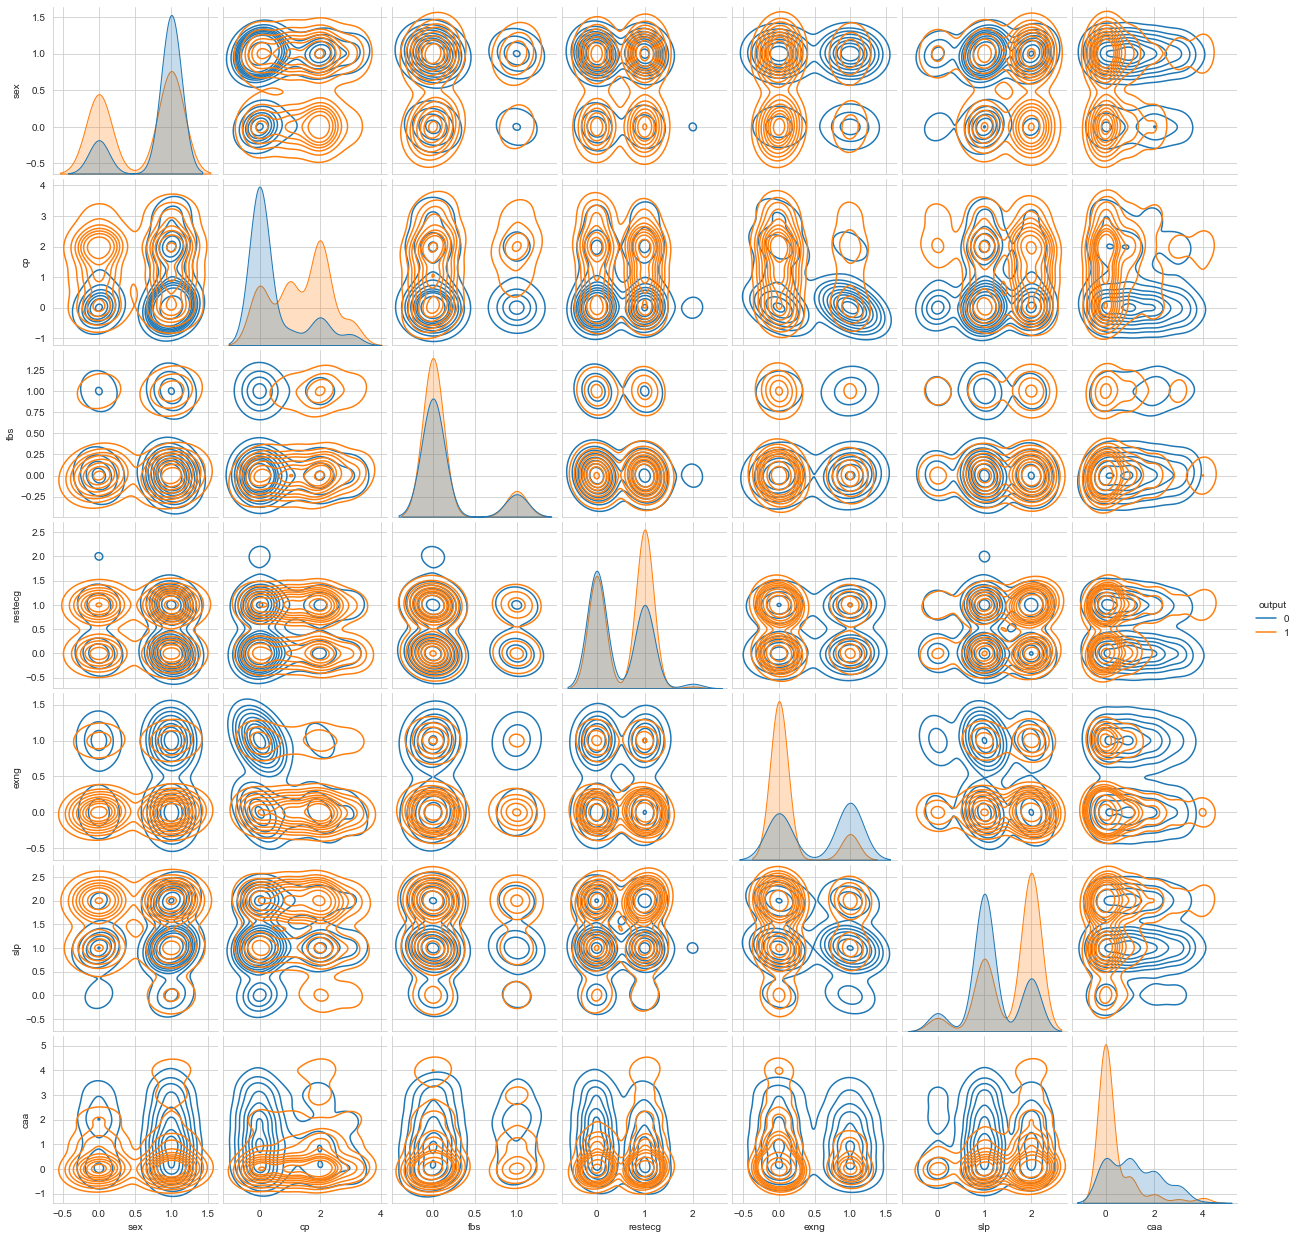

In [67]:
sns.pairplot(dis_value, kind='kde', hue='output')

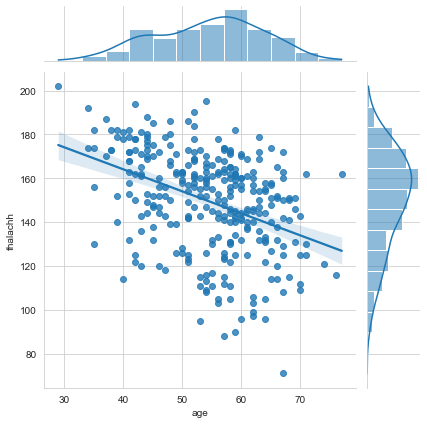

In [47]:
sns.jointplot(x='age', y='thalachh', kind='reg', data=df)

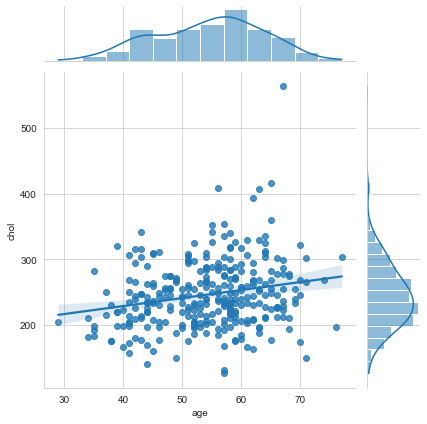

In [70]:
sns.jointplot(x='age', y='chol', kind='reg', data=df)

<AxesSubplot:xlabel='sex', ylabel='count'>

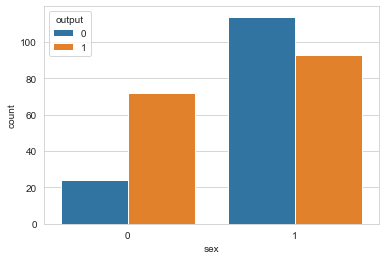

In [69]:
sns.countplot(data=df, x='sex', hue='output')

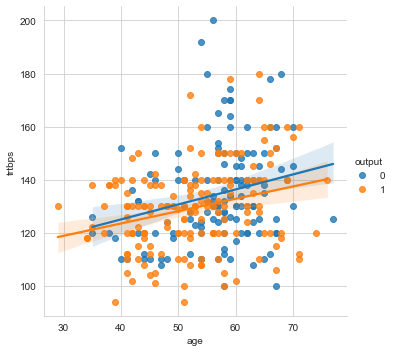

In [39]:
sns.lmplot(x='age', y='trtbps', data=df, hue='output')

### According to the Dataviz we can assume that:
1. Higher Thalachh value leads to heart attack
2. Chest Pain no. 2 also indicate heart attack

# Prepping the Data

In [87]:
dis_col = ['sex', 'cp', 'fbs', 'restecg', 'exng', 'slp', 'caa']
con_col = ['age', 'trtbps', 'chol', 'thalachh', 'oldpeak']

In [82]:
df1 = df
df1 = pd.get_dummies(df1, columns= dis_col, drop_first=True)

In [83]:
df1.head()

,age,trtbps,chol,thalachh,oldpeak,thall,output,sex_1,cp_1,cp_2,...,fbs_1,restecg_1,restecg_2,exng_1,slp_1,slp_2,caa_1,caa_2,caa_3,caa_4
0,63,145,233,150,2.3,1,1,1,0,0,...,1,0,0,0,0,0,0,0,0,0
1,37,130,250,187,3.5,2,1,1,0,1,...,0,1,0,0,0,0,0,0,0,0
2,41,130,204,172,1.4,2,1,0,1,0,...,0,0,0,0,0,1,0,0,0,0
3,56,120,236,178,0.8,2,1,1,1,0,...,0,1,0,0,0,1,0,0,0,0
4,57,120,354,163,0.6,2,1,0,0,0,...,0,1,0,1,0,1,0,0,0,0


In [84]:
X = df1.drop('output', axis=1)
y = df1['output']

In [88]:
from sklearn.preprocessing import RobustScaler
scaler = RobustScaler()
X[con_col] = scaler.fit_transform(X[con_col])

In [90]:
from sklearn.model_selection import train_test_split

In [91]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.3, random_state=101)

# Model

### Logistic Regression

In [95]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, classification_report

In [175]:
logmodel = LogisticRegression()
logmodel.fit(X_train,y_train)
logmodel.score(X_train, y_train)

0.8537735849056604

In [176]:
from sklearn.model_selection import cross_val_score
scores_log = cross_val_score(logmodel, X_train, y_train, cv=10, scoring='accuracy')
print(scores_log.mean())

0.8212121212121213


### Support Vector Machine

In [142]:
from sklearn.svm import SVC

In [177]:
svc_model = SVC()
svc_model.fit(X_train,y_train)
svc_model.score(X_train,y_train)

0.8632075471698113

#### Tuning the parameter

In [179]:
from sklearn.model_selection import GridSearchCV
param_grid = {'C': [0.1, 1, 5, 10, 20, 50], 'gamma': [1, 0.1, 0.01, 0.001, 1e-4, 1e-5]} 

In [180]:
grid = GridSearchCV(SVC(),param_grid,refit=True,verbose=2)
grid.fit(X_train, y_train)

Fitting 5 folds for each of 36 candidates, totalling 180 fits
[CV] END .....................................C=0.1, gamma=1; total time=   0.0s
[CV] END .....................................C=0.1, gamma=1; total time=   0.0s
[CV] END .....................................C=0.1, gamma=1; total time=   0.0s
[CV] END .....................................C=0.1, gamma=1; total time=   0.0s
[CV] END .....................................C=0.1, gamma=1; total time=   0.0s
[CV] END ...................................C=0.1, gamma=0.1; total time=   0.0s
[CV] END ...................................C=0.1, gamma=0.1; total time=   0.0s
[CV] END ...................................C=0.1, gamma=0.1; total time=   0.0s
[CV] END ...................................C=0.1, gamma=0.1; total time=   0.0s
[CV] END ...................................C=0.1, gamma=0.1; total time=   0.0s
[CV] END ..................................C=0.1, gamma=0.01; total time=   0.0s
[CV] END ..................................C=0.

[CV] END ...................................C=20, gamma=0.01; total time=   0.0s
[CV] END ...................................C=20, gamma=0.01; total time=   0.0s
[CV] END ...................................C=20, gamma=0.01; total time=   0.0s
[CV] END ...................................C=20, gamma=0.01; total time=   0.0s
[CV] END ..................................C=20, gamma=0.001; total time=   0.0s
[CV] END ..................................C=20, gamma=0.001; total time=   0.0s
[CV] END ..................................C=20, gamma=0.001; total time=   0.0s
[CV] END ..................................C=20, gamma=0.001; total time=   0.0s
[CV] END ..................................C=20, gamma=0.001; total time=   0.0s
[CV] END .................................C=20, gamma=0.0001; total time=   0.0s
[CV] END .................................C=20, gamma=0.0001; total time=   0.0s
[CV] END .................................C=20, gamma=0.0001; total time=   0.0s
[CV] END ...................

GridSearchCV(estimator=SVC(),
             param_grid={'C': [0.1, 1, 5, 10, 20, 50],
                         'gamma': [1, 0.1, 0.01, 0.001, 0.0001, 1e-05]},
             verbose=2)

In [181]:
print(grid.best_score_)
print(grid.best_estimator_)

0.8254706533776301
SVC(C=50, gamma=0.01)


In [182]:
scores_SVC = cross_val_score(SVC(C=50, gamma=0.01), X_train, y_train, cv=10, scoring='accuracy')
print(scores_SVC.mean())

0.8064935064935066


### Decision Tree

In [150]:
from sklearn.tree import DecisionTreeClassifier

In [152]:
dtree = DecisionTreeClassifier()
dtree.fit(X_train, y_train)
dtree.score(X_train, y_train)

1.0

In [183]:
scores_dtree = cross_val_score(dtree, X_train, y_train, cv=10, scoring='accuracy')
print(scores_dtree.mean())

0.6887445887445888


### Random Forest

In [185]:
from sklearn.ensemble import RandomForestClassifier

In [186]:
rfc = RandomForestClassifier()
rfc.fit(X_train, y_train)
rfc.score(X_train, y_train)

1.0

In [187]:
scores_rfc = cross_val_score(rfc, X_train, y_train, cv=10, scoring='accuracy')
print(scores_rfc.mean())

0.7735930735930735


### K-Nearest Neighbor

In [188]:
from sklearn.neighbors import KNeighborsClassifier

In [189]:
knn = KNeighborsClassifier(n_neighbors=3)
knn.fit(X_train, y_train)
knn.score(X_train, y_train)

0.8962264150943396

In [190]:
scores_knn = cross_val_score(knn, X_train, y_train, cv=10, scoring='accuracy')
print(scores_knn.mean())

0.7543290043290043


#### Choosing new value for K

In [191]:
error_rate = []

for i in range(1,40):
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(X_train, y_train)
    pred_i= knn.predict(X_test)
    error_rate.append(np.mean(pred_i != y_test))

Text(0, 0.5, 'Error Rate')

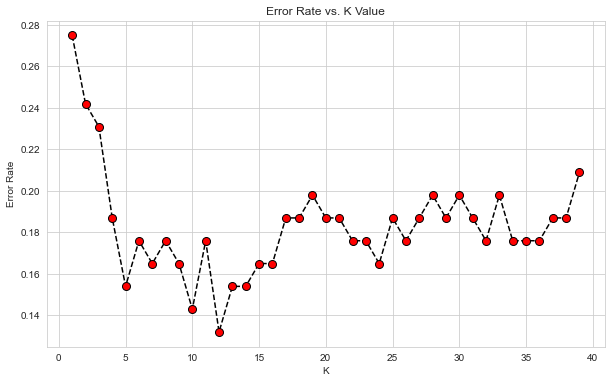

In [192]:
plt.figure(figsize=(10,6))
plt.plot(range(1,40),error_rate,color='black', linestyle='dashed', marker='o',
         markerfacecolor='red', markersize=8)
plt.title('Error Rate vs. K Value')
plt.xlabel('K')
plt.ylabel('Error Rate')

In [193]:
knn = KNeighborsClassifier(n_neighbors=12)
knn.fit(X_train, y_train)
knn.score(X_train, y_train)

0.8207547169811321

In [194]:
scores_knn = cross_val_score(knn, X_train, y_train, cv=10, scoring='accuracy')
print(scores_knn.mean())

0.773160173160173


# Choosing appropriate model according to validation score

In [198]:
print('logistic regression: ', scores_log.mean())
print('support vector machine: ',scores_SVC.mean())
print('decision tree: ', scores_dtree.mean())
print('random forest: ', scores_rfc.mean())
print('K nearest neighbor: ',scores_knn.mean())

logistic regression:  0.8212121212121213
support vector machine:  0.8064935064935066
decision tree:  0.6887445887445888
random forest:  0.7735930735930735
K nearest neighbor:  0.773160173160173


### Logistic Regression has the highest validation score. We now predict the test-data using aforementioned model

In [196]:
log_pred = logmodel.predict(X_test)
print(confusion_matrix(y_test, log_pred))
print(classification_report(y_test, log_pred))

[[35  9]
 [ 2 45]]
              precision    recall  f1-score   support

           0       0.95      0.80      0.86        44
           1       0.83      0.96      0.89        47

    accuracy                           0.88        91
   macro avg       0.89      0.88      0.88        91
weighted avg       0.89      0.88      0.88        91



### Model selection process is completed, but we could test other model using test-data just to look at the performance

##### SVC

In [197]:
grid_pred = grid.predict(X_test)
print(confusion_matrix(y_test, grid_pred))
print(classification_report(y_test, grid_pred))

[[34 10]
 [ 3 44]]
              precision    recall  f1-score   support

           0       0.92      0.77      0.84        44
           1       0.81      0.94      0.87        47

    accuracy                           0.86        91
   macro avg       0.87      0.85      0.86        91
weighted avg       0.87      0.86      0.86        91



##### Decision tree

In [199]:
dtree_pred= dtree.predict(X_test)
print(confusion_matrix(y_test, dtree_pred))
print(classification_report(y_test, dtree_pred))

[[31 13]
 [13 34]]
              precision    recall  f1-score   support

           0       0.70      0.70      0.70        44
           1       0.72      0.72      0.72        47

    accuracy                           0.71        91
   macro avg       0.71      0.71      0.71        91
weighted avg       0.71      0.71      0.71        91



##### Random Forest

In [200]:
rfc_pred= rfc.predict(X_test)
print(confusion_matrix(y_test, rfc_pred))
print(classification_report(y_test, rfc_pred))

[[33 11]
 [10 37]]
              precision    recall  f1-score   support

           0       0.77      0.75      0.76        44
           1       0.77      0.79      0.78        47

    accuracy                           0.77        91
   macro avg       0.77      0.77      0.77        91
weighted avg       0.77      0.77      0.77        91



##### K-Nearest Neighbor

In [201]:
knn_pred= knn.predict(X_test)
print(confusion_matrix(y_test, knn_pred))
print(classification_report(y_test, knn_pred))

[[38  6]
 [ 6 41]]
              precision    recall  f1-score   support

           0       0.86      0.86      0.86        44
           1       0.87      0.87      0.87        47

    accuracy                           0.87        91
   macro avg       0.87      0.87      0.87        91
weighted avg       0.87      0.87      0.87        91

